In [1]:
from google.cloud import bigquery
client = bigquery.Client

In [2]:
pip install pandas-gbq

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install google-cloud-bigquery

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import pandas_gbq
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Initialize BigQuery client
client = bigquery.Client()

/opt/conda/lib/python3.10/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.10/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [6]:
# Run SQL query
query = """
SELECT *
FROM 
  `yhcr-prd-bradfor-bia-core.CB_2514_Analysis_Tables.PredictionModel`
"""

In [7]:
# Read data from BigQuery into DataFrame
df = pandas_gbq.read_gbq(query, project_id='yhcr-prd-bradfor-bia-core')

# Display DataFrame
print(df)

/opt/conda/lib/python3.10/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Downloading: 100%|██████████|
        person_id  age  gender  ethnicity ctv3code  \
0             197   17       0          7    XaAnp   
1             230   59       0          7    XaAlZ   
2             272   20       0          0    XaaCX   
3             272   20       0          0    XaaCX   
4             406  101       0          0    XaAkj   
...           ...  ...     ...        ...      ...   
981632   14989081    2    <NA>          0    XaNUL   
981633   15032782    1    <NA>          7    XaNUL   
981634   15033417    1    <NA>          7    XaNUL   
981635   15036451   65       0          0    XaNUL   
981636   16768699   53       1          0    XaNUL   

                                                 ctv3text FirstEventDate  \
0                       Discharge from orthoptics service     2012-09-03   
1             Discharge from respiratory medicine service     2019-07-22   
2       Discharge from child and adolescent mental hea...     2019-10-03   
3       Discharge

In [8]:
# Step 2: Remove rows where 'gender_source_value' is NA
df= df.dropna(subset=['gender'])
# Step 3: Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data_after_gender_drop.csv', index=False)

In [9]:
# To drop duplicates
print(df.drop_duplicates())

        person_id  age  gender  ethnicity ctv3code  \
0             197   17       0          7    XaAnp   
1             230   59       0          7    XaAlZ   
2             272   20       0          0    XaaCX   
3             272   20       0          0    XaaCX   
4             406  101       0          0    XaAkj   
...           ...  ...     ...        ...      ...   
981629   14789932    2       1          8    XaNUL   
981630   14794573   48       1          0    XaNUL   
981631   14947040   81       1          0    XaNUL   
981635   15036451   65       0          0    XaNUL   
981636   16768699   53       1          0    XaNUL   

                                                 ctv3text FirstEventDate  \
0                       Discharge from orthoptics service     2012-09-03   
1             Discharge from respiratory medicine service     2019-07-22   
2       Discharge from child and adolescent mental hea...     2019-10-03   
3       Discharge from child and adolescent men

In [10]:
# Display the first 5 rows of the DataFrame
print(df.head())

   person_id  age  gender  ethnicity ctv3code  \
0        197   17       0          7    XaAnp   
1        230   59       0          7    XaAlZ   
2        272   20       0          0    XaaCX   
3        272   20       0          0    XaaCX   
4        406  101       0          0    XaAkj   

                                            ctv3text FirstEventDate  \
0                  Discharge from orthoptics service     2012-09-03   
1        Discharge from respiratory medicine service     2019-07-22   
2  Discharge from child and adolescent mental hea...     2019-10-03   
3  Discharge from child and adolescent mental hea...     2019-10-03   
4              Discharge by hospital-based dietitian     1999-01-06   

  NextEventDate  DaysBetweenEvents  ReadmissionStatus  
0          None                  0                  0  
1          None                  0                  0  
2    2019-10-03                  0                  1  
3    2020-07-21                292                  0 

In [11]:
# Descriptive statistics for numerical columns
print(df.describe())

            person_id        age    gender  ethnicity  DaysBetweenEvents  \
count        976318.0   976318.0  976318.0   976318.0           976318.0   
mean   12200742.59929  52.994738  0.439918   1.517291         531.494546   
std    3112305.572509  26.854471  0.496377   2.886286        1200.323933   
min              33.0        1.0       0.0        0.0                0.0   
25%        12627509.0       32.0       0.0        0.0                0.0   
50%        13010825.0       53.0       0.0        0.0                0.0   
75%        13394746.0       75.0       1.0        0.0              490.0   
max        16827749.0      129.0       1.0       10.0            33713.0   

       ReadmissionStatus  
count           976318.0  
mean            0.118332  
std             0.323001  
min                  0.0  
25%                  0.0  
50%                  0.0  
75%                  0.0  
max                  1.0  


In [12]:
# Summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 976318 entries, 0 to 981636
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   person_id          976318 non-null  Int64 
 1   age                976318 non-null  Int64 
 2   gender             976318 non-null  Int64 
 3   ethnicity          976318 non-null  Int64 
 4   ctv3code           976318 non-null  object
 5   ctv3text           976318 non-null  object
 6   FirstEventDate     976318 non-null  object
 7   NextEventDate      527016 non-null  object
 8   DaysBetweenEvents  976318 non-null  Int64 
 9   ReadmissionStatus  976318 non-null  Int64 
dtypes: Int64(6), object(4)
memory usage: 87.5+ MB
None


In [14]:
# Step 4: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
person_id                 0
age                       0
gender                    0
ethnicity                 0
ctv3code                  0
ctv3text                  0
FirstEventDate            0
NextEventDate        449302
DaysBetweenEvents         0
ReadmissionStatus         0
dtype: int64


In [15]:
# Step 6: Frequency distribution for categorical variables
print("\nGender distribution:")
print(df['gender'].value_counts())


Gender distribution:
gender
0    546818
1    429500
Name: count, dtype: Int64


In [16]:
print("\nEthnicity distribution:")
print(df['ethnicity'].value_counts())


Ethnicity distribution:
ethnicity
0     760670
7     178316
6      16600
8      10903
10      2984
2       2807
1       1680
4       1321
3        640
5        397
Name: count, dtype: Int64


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Step 1: Count the occurrences of each gender value
gender_counts = df['gender'].value_counts()

<Axes: xlabel='gender'>

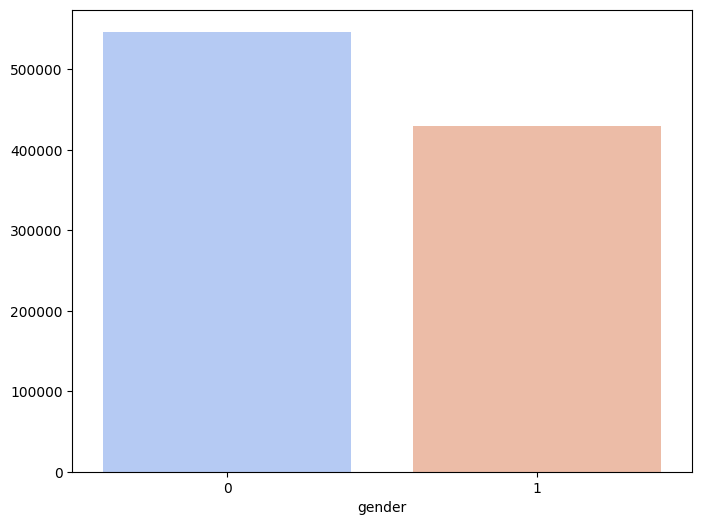

In [23]:
# Step 2: Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')

In [29]:
# Step 1: Count the occurrences of each ethnicity value
ethnicity_counts = df['ethnicity'].value_counts()

<Axes: xlabel='ethnicity'>

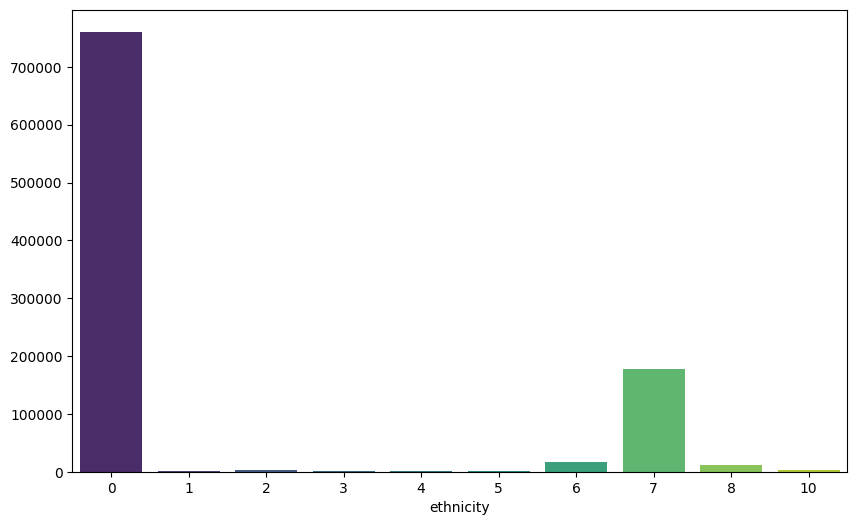

In [30]:
# Step 2: Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, palette='viridis')